## Statistical arbitrage with Cointegration and correlation

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import json
import math
import datetime

from yahoofinancials import YahooFinancials

from bs4 import BeautifulSoup

In [3]:
ticker_1 = "UGL"
ticker_2 = "NUGT"
ticker_3 = "ETH-USD"
ticker_4 = "COIN" 
tickers = [ticker_1, ticker_2, ticker_3, ticker_4]

start_date = "2022-12-11" 

end_date = str(datetime.date.today()) # "2019-3-30"# 

update = True

if update:
	stocks = YahooFinancials(tickers)
	historical_price = stocks.get_historical_price_data(start_date, end_date, "Daily")

	with open('data/data_arbitrage.py', 'w') as outfile:
	
		outfile.write("historical_price=")

		json.dump(historical_price, outfile)

else:
	from data.data_arbitrage import historical_price

	historical_price = historical_price
    
chart_data = {}
other_tickers = {}
longest = 0
longest_ticker = "ICE"


for ticker in tickers:
	# for all data before sorting
	# print ticker
	chart_data[ticker] = historical_price[ticker]["prices"]

	other_tickers[ticker] = len(historical_price[ticker]["prices"])

	if len(historical_price[ticker]["prices"]) > longest:

		longest = len(historical_price[ticker]["prices"])

		longest_ticker = ticker

save_data = {}
save_data["date"] = []
save_data["formatted_date"] = []

In [4]:
print("%s len: %d" % (ticker_1, len(chart_data[ticker_1])))
print("%s len: %d" % (ticker_1, len(chart_data[ticker_1])))
print("%s len: %d" % (ticker_2, len(chart_data[ticker_2])))
print("%s len: %d" % (ticker_2, len(chart_data[ticker_2])))

UGL len: 422
UGL len: 422
NUGT len: 422
NUGT len: 422


In [5]:
ticker_1, ticker_2 = "UGL", "NUGT"
pd_1 = pd.DataFrame(chart_data[ticker_1]) #pd.read_csv("data/dtickers/"+ticker_1+".csv")
pd_2 = pd.DataFrame(chart_data[ticker_2]) #pd.read_csv("data/dtickers/"+ticker_2+".csv")
df_test = pd.DataFrame()
df_test[ticker_1] = pd_1.adjclose
df_test[ticker_2] = pd_2.adjclose
df_test["date"] = pd_2.formatted_date
prices=df_test.set_index("date")
prices

,UGL,NUGT
date,,
2022-12-12,53.040001,33.454002
2022-12-13,54.840000,35.329750
2022-12-14,54.590000,35.078358
2022-12-15,52.720001,31.974684
2022-12-16,53.590000,32.380772
...,...,...
2024-08-12,85.680000,43.560001
2024-08-13,85.379997,44.720001
2024-08-14,83.949997,44.119999


In [6]:
def load_ticker_data(ticker, chart_data):
    rf_list = list()
    for i in range(0, len(chart_data[ticker]) ):
        rf_list.append( [ pd.to_datetime(chart_data[ticker][i]["formatted_date"]), \
                    chart_data[ticker][i]["adjclose"], chart_data[ticker][i]["high"],\
                    chart_data[ticker][i]["low"], chart_data[ticker][i]["open"],
                    chart_data[ticker][i]["close"], chart_data[ticker][i]["volume"]  
                    ])
    df = pd.DataFrame(rf_list, columns=["date", "adjclose", "high","low", "open", "close", "volume"])
    df = df.set_index("date")
    return df

data_dict = {}
for ticker in tickers:
    data_dict[ticker] = load_ticker_data(ticker, chart_data)

#df_final = load_ticker_data(ticker_1, chart_data)


In [7]:
df_final = pd.DataFrame()
df_final[ticker_1] = data_dict[ticker_1].open
df_final[ticker_2] = data_dict[ticker_2].open
df_final.dropna()


,UGL,NUGT
date,,
2022-12-12,53.520000,34.230000
2022-12-13,55.330002,37.099998
2022-12-14,54.750000,36.619999
2022-12-15,52.970001,34.150002
2022-12-16,53.130001,33.020000
...,...,...
2024-08-12,83.970001,41.900002
2024-08-13,85.470001,43.349998
2024-08-14,84.250000,43.990002


In [8]:
prices = pd.DataFrame()

for ticker in tickers:
    prices[ticker] = data_dict[ticker].open


returns = prices.pct_change().fillna(0)
returns

,UGL,NUGT,ETH-USD,COIN
date,,,,
2022-12-12,0.000000,0.000000,0.000000,0.000000
2022-12-13,0.033819,0.083845,0.008776,0.150825
2022-12-14,-0.010483,-0.012938,0.036108,-0.143447
2022-12-15,-0.032511,-0.067449,-0.008706,-0.011672
2022-12-16,0.003021,-0.033089,-0.032639,-0.039795
...,...,...,...,...
2024-08-12,0.011931,0.017731,-0.048523,0.015735
2024-08-13,0.017864,0.034606,0.066891,-0.006022
2024-08-14,-0.014274,0.014764,-0.007604,0.040232


In [9]:
#np.std(prices)
cumreturns = (returns+1).cumprod()
cumreturns

,UGL,NUGT,ETH-USD,COIN
date,,,,
2022-12-12,1.000000,1.000000,1.000000,1.000000
2022-12-13,1.033819,1.083845,1.008776,1.150825
2022-12-14,1.022982,1.069822,1.045201,0.985743
2022-12-15,0.989723,0.997663,1.036102,0.974237
2022-12-16,0.992713,0.964651,1.002285,0.935468
...,...,...,...,...
2024-08-12,1.568946,1.224073,2.020853,4.859930
2024-08-13,1.596973,1.266433,2.156031,4.830666
2024-08-14,1.574178,1.285130,2.139636,5.025012


In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import coint

# create two time series

x = prices["UGL"]
y = prices["NUGT"]

# test for cointegration
t_stat, p_value, _ = coint(x, y)
print("corr: %s" % x.corr(y))
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# P-value and correlation are not good for arbitrage, but this is a demo.

corr: 0.5547578838482627
T-statistic: -0.4778
P-value: 0.9659


In [11]:
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Generate two non-stationary time series

x = prices["ETH-USD"]
y = prices["COIN"]

# Compute the cointegration test
result = sm.tsa.stattools.coint(x, y)

# Print the p-value
print('p-value:', result[1])

corr = returns["ETH-USD"].corr(returns["COIN"])
print('Correlation:\n', corr)

p-value: 0.00435330106333925
Correlation:
 0.37493750060406217


In [12]:
#high_corr_pairs = [(corr.index[i], corr.index[j]) for i in range(len(corr)) for j in range(i+1, len(corr)) if corr[i] > 0.8 and corr[j] > 0.8]
#high_corr_pairs

In [13]:
high_corr_pairs = [("UGL", "NUGT")] #, ("COIN", "ETH-USD")

In [14]:
trades = []
for pair in high_corr_pairs:
    stock1 = pair[0]
    stock2 = pair[1]
    spread = prices[stock1] - prices[stock2]
    
    spread_mean = np.mean(spread)
    spread_std = np.std(spread)
    z_score = (spread - spread_mean) / spread_std
    #print(z_score)
    #model = sm.OLS(z_score, ).fit()
    print(z_score)
    model = sm.OLS(z_score[1:], sm.add_constant(returns[[stock1, stock2]])).fit()
    
    trades.append((stock1, stock2, model.params[1], model.params[2]))

date
2022-12-12   -1.243982
2022-12-13   -1.382478
2022-12-14   -1.395544
2022-12-15   -1.305391
2022-12-16   -1.136843
                ...   
2024-08-12    1.732386
2024-08-13    1.738919
2024-08-14    1.495896
2024-08-15    1.451473
2024-08-16    1.586050
Length: 422, dtype: float64


ValueError: The indices for endog and exog are not aligned

In [15]:
trades

[]

In [16]:

for trade in trades:
    stock1 = trade[0]
    stock2 = trade[1]
    beta1 = trade[2]
    beta2 = trade[3]
    spread = prices[stock1] - prices[stock2]
    spread_mean = np.mean(spread)
    spread_std = np.std(spread)
    
    z_score = (spread - spread_mean) / spread_std
    print(z_score)
    if z_score[-1] > 1.6:
        # enter a long position in stock1 and a short position in stock2
        print("long: %s, short: %s" % (stock1, stock2))
    elif z_score[-1] < -1.6:
        # enter a short position in stock1 and a long position in stock2
        print("long: %s, short: %s" % (stock2, stock1))

In [17]:
pd.set_option('display.max_columns', None)
z = pd.DataFrame(z_score)

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
print(plt.style.available)
plt.style.use('ggplot')
# specifying horizontal line type 

plt.figure(figsize=(15,7))
plt.plot(z_score)
plt.hlines(1.5, z_score.index[0], z_score.index[-1], linestyles='dashed', colors='r')

plt.hlines(-1, z_score.index[0], z_score.index[-1], linestyles='dashed', colors='r')
plt.title('z score', fontsize=14)
# rendering the plot 
plt.grid(True)
plt.show()


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

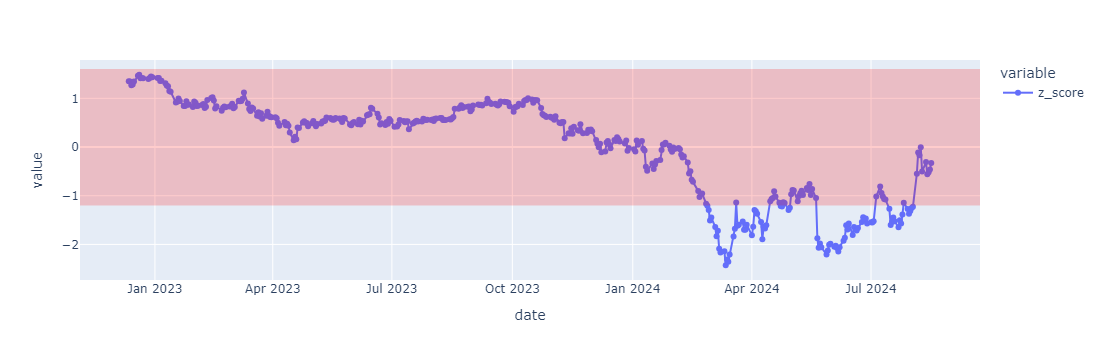

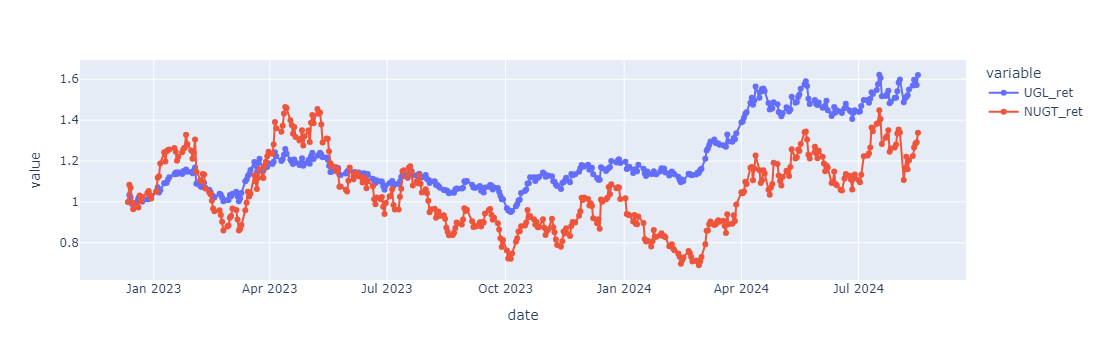

In [79]:
import plotly.express as px
#df = px.data.gapminder().query("continent == 'Oceania'")
import plotly as py
import plotly.graph_objs as go
import plotly.offline as offline_py

offline_py.init_notebook_mode(connected=True)
df_test = pd.DataFrame(z_score, columns=["z_score"])

fig = px.scatter(df_test)

fig.update_traces(mode='markers+lines')
fig.add_hrect(y0=-1.2, y1=1.6, line_width=0, fillcolor="red", opacity=0.2)
fig.show()

ret1 = cumreturns["UGL"]
ret2 = cumreturns["NUGT"]

df_fig3 = pd.DataFrame()
df_fig3["UGL_ret"] = ret1
df_fig3["NUGT_ret"] = ret2

fig3 = px.scatter(df_fig3)

fig3.update_traces(mode='markers+lines')

fig3.show()

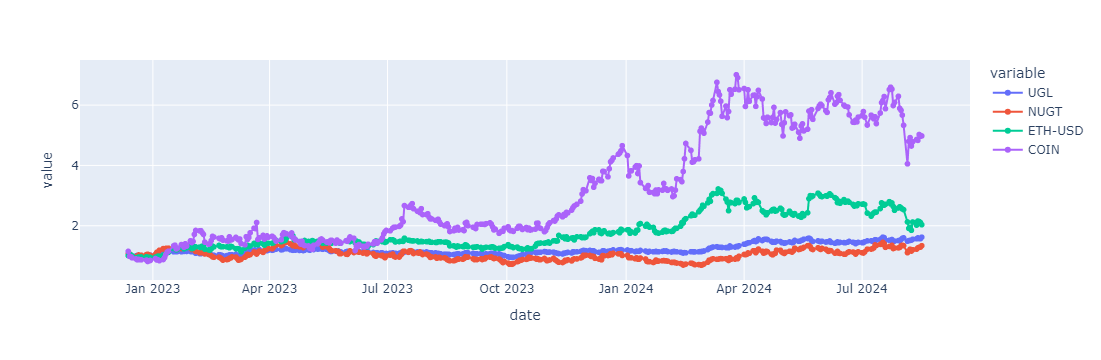

In [42]:
df_test = pd.DataFrame(z_score, columns=["z_score"])

fig = px.scatter(cumreturns)

fig.update_traces(mode='markers+lines')

fig.show()

C:\Users\charles\Documents\Codes\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\charles\Documents\Codes\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\charles\Documents\Codes\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\charles\Documents\Codes\env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\charles\Documents\Codes\env\Lib\site-packages\statsmodels\tsa\base

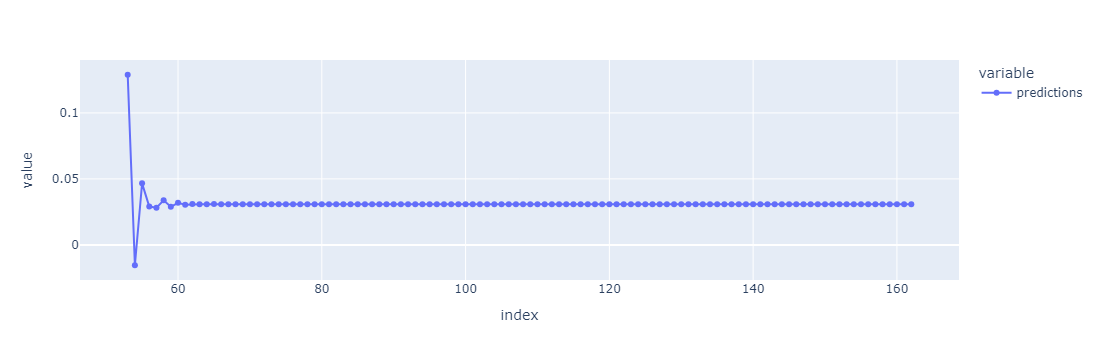

In [32]:
# arima 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load and preprocess data
data = prices[ticker_1]
data = data.diff().dropna()

# Split data into training and testing sets
train_data = data.iloc[:len(data)-110]
test_data = data.iloc[len(data)-110:]

# Create and fit ARIMA model
model = sm.tsa.ARIMA(train_data, order=(2, 1, 2))
results = model.fit()

# Make predictions
predictions = results.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False)

# Plot results
df_test = pd.DataFrame()
#df_test["training"] = train_data
# df_test["testing"] = test_data
df_test["predictions"] = predictions

fig = px.scatter(df_test)

fig.update_traces(mode='markers+lines')

fig.show()

In [33]:
from arch import arch_model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = prices[ticker_1]

# Split data into training and testing sets
train_data = data.iloc[:-100]
test_data = data.iloc[-100:]

# Create ARCH model
model = arch_model(train_data, vol='GARCH', p=1, q=1)

# Fit the model
results = model.fit()

# Make predictions
predictions = results.forecast(horizon=len(test_data))

"""
# Plot results
plt.plot(train_data, label='Training')
plt.plot(test_data, label='Testing')
plt.plot(predictions.variance.values[-1, :], label='Predictions')
plt.legend()
plt.show()
"""
# Plot results
df_test = pd.DataFrame()
#df_test["training"] = train_data
#df_test["testing"] = test_data
df_test["predictions"] = predictions.variance.values[-1, :]

fig = px.scatter(df_test)

fig.update_traces(mode='markers+lines')

fig.show()

ModuleNotFoundError: No module named 'arch'

In [26]:
import pandas as pd

# create a DataFrame
data = {'Name': ['John', 'Jane', 'Mike', 'Alice'],
        'Age': [25, 30, 35, 28],
        'Gender': ['M', 'F', 'M', 'F']}
df = pd.DataFrame(data)

# save the DataFrame as a CSV file
df.to_csv('my_data.csv', index=False)
returns.to_csv('my_data2.csv', index=True)

In [27]:
import pandas as pd
from data.ticker_us import stocks_data

df = pd.DataFrame(stocks_data)

In [28]:
print(data_dict[ticker_1]["close"])

date
2023-12-11     466.269989
2023-12-12     476.570007
2023-12-13     480.880005
2023-12-14     483.500000
2023-12-15     488.899994
                 ...     
2024-05-24    1064.689941
2024-05-28    1139.010010
2024-05-29    1148.250000
2024-05-30    1105.000000
2024-05-31    1096.329956
Name: close, Length: 119, dtype: float64


In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# create a sample DataFrame
df = pd.DataFrame({ticker_1: data_dict[ticker_1]["adjclose"], ticker_2: data_dict[ticker_2]["adjclose"]})

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit and transform the data
normalized_data = scaler.fit_transform(df)

# create a new DataFrame with the normalized data
df_normalized = pd.DataFrame(normalized_data, columns=df.columns)

print(df_normalized)

         NVDA       AMD
0    0.000000  0.000000
1    0.015102  0.041575
2    0.021421  0.049110
3    0.025263  0.046642
4    0.033180  0.061582
..        ...       ...
114  0.877478  0.415097
115  0.986452  0.483305
116  1.000000  0.399246
117  0.936584  0.420164
118  0.923871  0.422112

[119 rows x 2 columns]


In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# create a sample DataFrame
df = pd.DataFrame({ticker_1: data_dict[ticker_1]["close"].pct_change().dropna(), ticker_2: data_dict[ticker_2]["close"].pct_change().dropna()})

# create a StandardScaler object
scaler = StandardScaler()

# fit and transform the data
standardized_data = scaler.fit_transform(df)

# create a new DataFrame with the standardized data
df_standardized = pd.DataFrame(standardized_data, columns=df.columns)

print(df_standardized)

         NVDA       AMD
0    0.457281  0.698674
1    0.041193  0.061963
2   -0.073476 -0.119687
3    0.108958  0.195801
4    0.527086 -0.133391
..        ...       ...
113  0.573132  1.126187
114  1.979021  0.950536
115  0.011485 -1.300200
116 -1.448514  0.241817
117 -0.497476 -0.045775

[118 rows x 2 columns]


In [31]:
data_dict

{'NVDA':                adjclose         high          low         open        close  \
 date                                                                          
 2023-12-11   466.248108   475.309998   458.299988   474.910004   466.269989   
 2023-12-12   476.547638   476.660004   460.459991   460.459991   476.570007   
 2023-12-13   480.857452   485.940002   476.079987   476.290009   480.880005   
 2023-12-14   483.477325   486.700012   474.220001   483.899994   483.500000   
 2023-12-15   488.877075   494.040009   481.200012   481.940002   488.899994   
 ...                 ...          ...          ...          ...          ...   
 2024-05-24  1064.689941  1064.750000  1030.000000  1044.489990  1064.689941   
 2024-05-28  1139.010010  1149.390015  1098.829956  1102.439941  1139.010010   
 2024-05-29  1148.250000  1154.920044  1109.010010  1130.500000  1148.250000   
 2024-05-30  1105.000000  1158.189941  1096.630005  1146.500000  1105.000000   
 2024-05-31  1096.329956  1127.1

In [32]:
#df_test = pd.DataFrame(z_score, columns=["z_score"])

fig = px.scatter(df)

fig.update_traces(mode='markers+lines')

fig.show()


In [30]:
df_standardized[ticker_1]-df_standardized[ticker_2]


NameError: name 'df_standardized' is not defined

In [31]:
from data.ticker_us import stocks_data

In [32]:
ticker_set = pd.DataFrame(stocks_data)

In [33]:
ticker_set

,ticker,name,price,market_cap,ipo_yr,sector
0,A,Agilent Technologies Common Stock,$119.32,35244240456.00,1999,Industrials
1,AA,Alcoa Corporation Common Stock,$34.27,6113819405.00,2016,Industrials
2,AAC,Ares Acquisition Corporation Class A Ordinary ...,$10.56,760289175.00,2021,Industrials
3,AAIN,Arlington Asset Investment Corp 6.000% Senior ...,$23.84,676113056.00,,Real Estate
4,AAL,American Airlines Group Common Stock,$18.10,11816811250.00,,Consumer Discretionary
...,...,...,...,...,...,...
3076,ZS,Zscaler Common Stock,$146.59,21386186317.00,2018,Technology
3077,ZTO,ZTO Express (Cayman) American Depositary Shar...,$25.15,20504085368.00,2016,Industrials
3078,ZTS,Zoetis Class A Common Stock,$170.23,78665349592.00,2013,Health Care
3079,ZUO,Zuora Class A Common Stock,$11.17,1532524000.00,2018,Technology


In [131]:
import time
start_date = "2020-01-20" #"2013-11-20" # "2018-6-15" #"2016-10-15"

end_date = "2023-07-05" #str(datetime.date.today()) # "2019-3-30"# 

update = True

ticker = "AAPL"


tickers = ["VLYPP"]
for ticker in tickers:#ticker_set.ticker[2901:]:
    if update:
        stocks = YahooFinancials(ticker)
        historical_price = stocks.get_historical_price_data(start_date, end_date, "Daily")
        p = pd.DataFrame(historical_price)
        filename = "data/dtickers/"+ticker+".csv"
        pd.DataFrame(p[ticker]['prices']).to_csv(filename)
        
        div = pd.DataFrame(p[ticker].eventsData)
        div['ticker'] = ticker
        div['last'] = round(p[ticker]['prices'][-1]["adjclose"],4)
        div.to_csv('data/dividends.csv', mode='a',header=False)
        time.sleep(1)

In [318]:
p = pd.DataFrame(historical_price)
filename = "data/dtickers/"+ticker+".csv"
pd.DataFrame(p[ticker]['prices']).to_csv(filename)

In [364]:
ticker_set[2409::]

,ticker,name,price,market_cap,ipo_yr,sector
2409,SANA,Sana Biotechnology Common Stock,$6.04,1156665702.00,2021,Health Care
2410,SAND,Sandstorm Gold Ltd. Ordinary Shares (Canada),$5.28,1577349455.00,,
2411,SANM,Sanmina Corporation Common Stock,$60.20,3501765312.00,1993,Technology
2412,SAP,SAP SE ADS,$134.55,165295244416.00,,Technology
2413,SASR,Sandy Spring Bancorp Common Stock,$23.21,1040631862.00,,Finance
...,...,...,...,...,...,...
3076,ZS,Zscaler Common Stock,$146.59,21386186317.00,2018,Technology
3077,ZTO,ZTO Express (Cayman) American Depositary Shar...,$25.15,20504085368.00,2016,Industrials
3078,ZTS,Zoetis Class A Common Stock,$170.23,78665349592.00,2013,Health Care
3079,ZUO,Zuora Class A Common Stock,$11.17,1532524000.00,2018,Technology


In [319]:
div = pd.DataFrame(p[ticker].eventsData)
div['ticker'] = ticker
div['last'] = round(p[ticker]['prices'][-1]["adjclose"],4)
div.to_csv('data/dividends.csv', mode='a',header=False)

In [322]:
d = [{"ticker":"A","last":"12","event":"data"}]
# date, ticker, last, dividends
#ndb.Model().put("dividends", d)

In [279]:
import csv
for row in d:
    with open('data/dividends.csv', 'a', newline='') as f:
        # Create a dictionary writer with the dict keys as column fieldnames
        writer = csv.DictWriter(f, fieldnames=row.keys())
        # Append single row to CSV
        writer.writerow(row)

In [303]:
round(p[ticker]['prices'][-1].adjclose,4)

{'date': 1688391000,
 'high': 170.6999969482422,
 'low': 168.6999969482422,
 'open': 170.52999877929688,
 'close': 170.22999572753906,
 'volume': 742900,
 'adjclose': 170.22999572753906,
 'formatted_date': '2023-07-03'}

In [417]:
df_div = pd.read_csv('data/dividends.csv')

In [440]:
import json

l = df_div.event[0][11:].find(',')
df_div.event[12][11:11+l]

'0.3'

In [453]:
div_list = []
for amt in df_div.event:
    #print(amt[11:])
    l = amt[11:].find(',')
    dif = amt[11:11+l]
    div_list.append(dif)
#print(div_list)
print(len(div_list))

21648


In [456]:
df_div["amount"] =div_list
df_div.to_csv('data/dividends.csv')

In [431]:
df_ticker = pd.read_csv('data/dtickers/AAPL.csv')

In [432]:
df_ticker

,Unnamed: 0,date,high,low,open,close,volume,adjclose,formatted_date
0,0,1579617000,79.754997,79.000000,79.297501,79.142502,110843200,77.308998,2020-01-21
1,1,1579703400,79.997498,79.327499,79.644997,79.425003,101832400,77.584969,2020-01-22
2,2,1579789800,79.889999,78.912498,79.480003,79.807503,104472000,77.958595,2020-01-23
3,3,1579876200,80.832497,79.379997,80.062500,79.577499,146537600,77.733902,2020-01-24
4,4,1580135400,77.942497,76.220001,77.514999,77.237503,161940000,75.448143,2020-01-27
...,...,...,...,...,...,...,...,...,...
864,864,1687872600,188.389999,185.669998,185.889999,188.059998,50730800,188.059998,2023-06-27
865,865,1687959000,189.899994,187.600006,187.929993,189.250000,51216800,189.250000,2023-06-28
866,866,1688045400,190.070007,188.940002,189.080002,189.589996,46347300,189.589996,2023-06-29
867,867,1688131800,194.479996,191.259995,191.630005,193.970001,85069600,193.970001,2023-06-30


In [486]:
df

,MS,GS
date,,
2022-01-21,-0.009717,-0.012037
2022-01-24,-0.007890,-0.001512
2022-01-25,0.009788,-0.005358
2022-01-26,0.011410,0.003308
2022-01-27,0.009783,-0.004815
...,...,...
2023-06-27,0.010049,0.003490
2023-06-28,-0.005211,0.000670
2023-06-29,0.014883,0.030064


In [521]:
df_ms = pd.read_csv('data/dtickers/MS.csv')
df_gs = pd.read_csv('data/dtickers/GS.csv')
df_ms = df_ms[600:700]
df_gs = df_gs[600:700]
df_ms

,Unnamed: 0,date,high,low,open,close,volume,adjclose,formatted_date
600,600,1654608600,85.400002,83.879997,84.150002,85.330002,4514300,82.333740,2022-06-07
601,601,1654695000,85.129997,82.739998,84.500000,83.199997,6787200,80.278534,2022-06-08
602,602,1654781400,82.879997,81.150002,82.699997,81.160004,6951700,78.310173,2022-06-09
603,603,1654867800,79.709999,76.949997,79.540001,77.400002,9671600,74.682198,2022-06-10
604,604,1655127000,76.260002,74.139999,75.019997,75.180000,10446400,72.540146,2022-06-13
...,...,...,...,...,...,...,...,...,...
695,695,1666359000,79.529999,76.220001,76.610001,79.220001,8149000,77.163063,2022-10-21
696,696,1666618200,81.099998,78.570000,79.529999,79.430000,8143300,77.367615,2022-10-24
697,697,1666704600,80.669998,78.610001,78.610001,80.510002,8173600,78.419579,2022-10-25
698,698,1666791000,82.050003,80.580002,80.599998,80.910004,7733400,78.809196,2022-10-26


In [41]:
df_1 = pd.DataFrame()

df_1[ticker_3] = prices[ticker_3].pct_change().fillna(0).cumsum()
df_1[ticker_4] = prices[ticker_4].pct_change().fillna(0).cumsum()

In [42]:
fig = px.scatter(df_1)

fig.update_traces(mode='markers+lines')

fig.show()

In [113]:
df_fig = df_final.pct_change().fillna(0).cumsum()
#df_test

In [115]:
df_fig["z_score"] = df_test.z_score

In [116]:
#df_final.pct_change().fillna(0).cumsum()

In [117]:
df_fig

,F,GM,z_score
date,,,
2023-04-19,0.000000,0.000000,-0.468369
2023-04-20,-0.062698,-0.045598,0.201225
2023-04-21,-0.055078,-0.038086,0.133297
2023-04-24,-0.055918,-0.030928,-0.245171
2023-04-25,-0.049190,-0.024413,0.715552
2023-04-26,-0.063392,-0.056482,1.161947
2023-04-27,-0.079494,-0.072895,0.744663
2023-04-28,-0.081216,-0.071041,0.696143
2023-05-01,-0.044978,-0.022306,0.443833


In [118]:
fig = px.scatter(df_fig)

fig.update_traces(mode='markers+lines')

fig.show()

In [20]:

df_final = pd.DataFrame()
df_final[ticker_1] = data_dict[ticker_1].open
df_final[ticker_2] = data_dict[ticker_2].open/1000
df_final = df_final.dropna()

,UGL,NUGT
date,,
2010-06-21,57.279999,NaN
2010-06-22,55.400002,NaN
2010-06-23,55.200001,NaN
2010-06-24,55.020000,NaN
2010-06-25,56.880001,NaN
...,...,...
2024-03-06,67.480003,0.02946
2024-03-07,68.419998,0.03049
2024-03-08,69.320000,0.03097


In [26]:
import plotly.express as px
#df = px.data.gapminder().query("continent == 'Oceania'")
import plotly as py
import plotly.graph_objs as go
import plotly.offline as offline_py

offline_py.init_notebook_mode(connected=True)
#df_test = pd.DataFrame(z_score, columns=["z_score"])

fig = px.scatter(df_final["2018-06-25":])

fig.update_traces(mode='markers+lines')

fig.show()